In [7]:
import pandas as pd
import requests
import numpy as np
import statsapi

In [8]:
url = 'http://statsapi.mlb.com/api/v1/schedule/games/?sportId=1'
r = requests.get(url=url).json()
dates = r['dates'][0]['games']
df = pd.DataFrame(dates)
df

,gamePk,gameGuid,link,gameType,season,gameDate,officialDate,status,teams,venue,...,dayNight,scheduledInnings,reverseHomeAwayStatus,inningBreakLength,gamesInSeries,seriesGameNumber,seriesDescription,recordSource,ifNecessary,ifNecessaryDescription
0,746688,85b1ad90-0073-46e6-8a5d-2948028a77a4,/api/v1.1/game/746688/feed/live,R,2024,2024-07-11T17:10:00Z,2024-07-11,"{'abstractGameState': 'Live', 'codedGameState'...","{'away': {'leagueRecord': {'wins': 33, 'losses...","{'id': 2602, 'name': 'Great American Ball Park...",...,day,9,False,120,1,1,Regular Season,S,N,Normal Game
1,746452,df593bd1-bbd7-48d1-8f0b-3973066e683c,/api/v1.1/game/746452/feed/live,R,2024,2024-07-11T17:10:00Z,2024-07-11,"{'abstractGameState': 'Live', 'codedGameState'...","{'away': {'leagueRecord': {'wins': 57, 'losses...","{'id': 2394, 'name': 'Comerica Park', 'link': ...",...,day,9,False,120,4,4,Regular Season,S,N,Normal Game
2,745799,e1a9f001-2aeb-466c-b12b-d3ca174a830c,/api/v1.1/game/745799/feed/live,R,2024,2024-07-11T17:10:00Z,2024-07-11,"{'abstractGameState': 'Live', 'codedGameState'...","{'away': {'leagueRecord': {'wins': 42, 'losses...","{'id': 3289, 'name': 'Citi Field', 'link': '/a...",...,day,9,False,120,3,3,Regular Season,S,N,Normal Game
3,745967,17609f1e-c42d-47b7-b127-e5745241a5c1,/api/v1.1/game/745967/feed/live,R,2024,2024-07-11T18:10:00Z,2024-07-11,"{'abstractGameState': 'Live', 'codedGameState'...","{'away': {'leagueRecord': {'wins': 44, 'losses...","{'id': 32, 'name': 'American Family Field', 'l...",...,day,9,False,120,3,3,Regular Season,S,N,Normal Game
4,745313,a773f155-7608-4250-a131-2060747fb5c8,/api/v1.1/game/745313/feed/live,R,2024,2024-07-11T19:45:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 42, 'losses...","{'id': 2395, 'name': 'Oracle Park', 'link': '/...",...,day,9,False,120,3,3,Regular Season,S,N,Normal Game
5,745558,5a5b783c-71ad-4f42-9a74-25ddf483444d,/api/v1.1/game/745558/feed/live,R,2024,2024-07-11T22:05:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 55, 'losses...","{'id': 2681, 'name': 'Citizens Bank Park', 'li...",...,night,9,False,145,3,3,Regular Season,S,N,Normal Game
6,747011,5d161065-b8f6-484a-89ff-246eb020fc0a,/api/v1.1/game/747011/feed/live,R,2024,2024-07-11T22:35:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 44, 'losses...","{'id': 2, 'name': 'Oriole Park at Camden Yards...",...,night,9,False,120,3,3,Regular Season,S,N,Normal Game
7,745065,23f8906c-f1af-4fa3-b4d4-aca2503b9320,/api/v1.1/game/745065/feed/live,R,2024,2024-07-11T22:50:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 56, 'losses...","{'id': 12, 'name': 'Tropicana Field', 'link': ...",...,night,9,False,120,3,3,Regular Season,S,N,Normal Game
8,746935,275f24a1-917f-4a32-b2af-69fef87e8989,/api/v1.1/game/746935/feed/live,R,2024,2024-07-11T23:10:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 35, 'losses...","{'id': 3, 'name': 'Fenway Park', 'link': '/api...",...,night,9,False,120,3,3,Regular Season,S,N,Normal Game
9,746367,9cf9bd1b-951f-4148-9499-6be47cdfcd2c,/api/v1.1/game/746367/feed/live,R,2024,2024-07-12T00:10:00Z,2024-07-11,"{'abstractGameState': 'Preview', 'codedGameSta...","{'away': {'leagueRecord': {'wins': 32, 'losses...","{'id': 2392, 'name': 'Minute Maid Park', 'link...",...,night,9,False,120,3,3,Regular Season,S,N,Normal Game


In [9]:
HOST = 'https://statsapi.mlb.com'
url = HOST + df.loc[0,'link']
r = requests.get(url=url).json()
player_df = pd.DataFrame(r['gameData']['players'])
player_df_all = pd.DataFrame(['players'])
player_df = player_df.T


In [10]:
player = statsapi.player_stat_data(694973, group= "hitting", type="season", sportId=1)
# float(player['stats'][0]['stats']['avg'])
# print(player)

def get_avg(player_id):
    player = statsapi.player_stat_data(int(player_id), group= "hitting", type="season", sportId=1)
    if player['position'] == 'P':
        return 0
    return float(player['stats'][0]['stats']['avg'])

averages = player_df.id.apply(get_avg)
player_df = player_df.assign(avg=averages.values)
player_df

,id,fullName,link,firstName,lastName,primaryNumber,birthDate,currentAge,birthCity,birthStateProvince,...,lastInitName,initLastName,fullFMLName,fullLFMName,strikeZoneTop,strikeZoneBottom,nameMatrilineal,nickName,pronunciation,avg
ID668881,668881,Hunter Greene,/api/v1/people/668881,Christian,Greene,21,1999-08-06,24,Los Angeles,CA,...,"Greene, H",H Greene,Christian Hunter Greene,"Greene, Christian Hunter",3.575,1.681,NaN,NaN,NaN,0.000
ID682829,682829,Elly De La Cruz,/api/v1/people/682829,Elly,De La Cruz,44,2002-01-11,22,Sabana Grande de Boya,NaN,...,"De La Cruz, E",E De La Cruz,Elly Antonio De La Cruz,"De La Cruz, Elly Antonio",3.62,1.69,Sanchez,NaN,NaN,0.250
ID668845,668845,Aaron Schunk,/api/v1/people/668845,Aaron,Schunk,30,1997-07-24,26,Atlanta,GA,...,"Schunk, A",A Schunk,Aaron Livingston Schunk,"Schunk, Aaron Livingston",3.411,1.565,NaN,NaN,NaN,0.077
ID680767,680767,Victor Vodnik,/api/v1/people/680767,Victor,Vodnik,38,1999-10-09,24,Whittier,CA,...,"Vodnik, V",V Vodnik,Victor Francisco Vodnik,"Vodnik, Victor Francisco",3.371,1.535,NaN,NaN,NaN,0.000
ID642851,642851,Austin Wynns,/api/v1/people/642851,Robert,Wynns,35,1990-12-10,33,San Diego,CA,...,"Wynns, A",A Wynns,Robert Austin Wynns,"Wynns, Robert Austin",3.5,1.63,NaN,Winnie,NaN,0.545
ID682622,682622,Noelvi Marte,/api/v1/people/682622,Noelvi,Marte,16,2001-10-16,22,Cotui,NaN,...,"Marte, N",N Marte,Noelvi Marte,"Marte, Noelvi",3.4,1.65,Diaz,NaN,NaN,0.170
ID656222,656222,Jalen Beeks,/api/v1/people/656222,Jalen,Beeks,68,1993-07-10,31,Fayetteville,AR,...,"Beeks, J",J Beeks,Jalen Christopher Beeks,"Beeks, Jalen Christopher",3.319,1.513,NaN,Beeker,NaN,0.000
ID656541,656541,Sam Hilliard,/api/v1/people/656541,Samuel,Hilliard,16,1994-02-21,30,Mansfield,TX,...,"Hilliard, S",S Hilliard,Samuel Beauman Hilliard,"Hilliard, Samuel Beauman",3.63,1.73,NaN,NaN,NaN,0.250
ID607732,607732,Jacob Stallings,/api/v1/people/607732,Jacob,Stallings,25,1989-12-22,34,Lawrence,KS,...,"Stallings, J",J Stallings,Jacob Daniel Stallings,"Stallings, Jacob Daniel",3.31,1.54,NaN,Stalls,NaN,0.265
ID607259,607259,Nick Martinez,/api/v1/people/607259,Nicholas,Martinez,28,1990-08-05,33,Miami,FL,...,"Martinez, N",N Martinez,Nicholas Andres Martinez,"Martinez, Nicholas Andres",3.411,1.565,NaN,Tricky,NaN,0.000


In [13]:
strikezone_size = player_df.strikeZoneTop - player_df.strikeZoneBottom
player_df = player_df.assign(strikezone_size=strikezone_size.values)

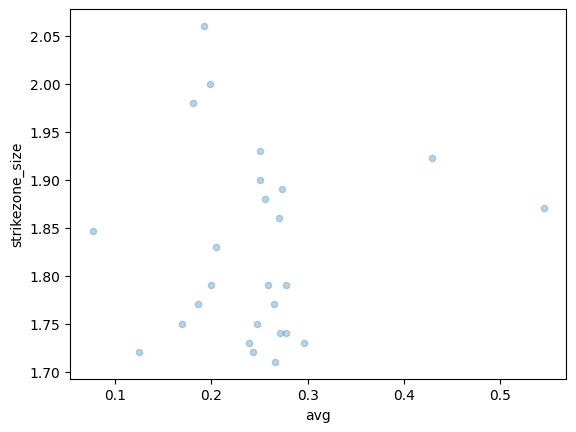

In [12]:
not_pitchers = player_df['avg'] != 0
ax = player_df[not_pitchers].plot.scatter(x='avg', y='strikezone_size', alpha = 0.3)

In [16]:
player = statsapi.player_stat_data(502110, group= "hitting", type="season", sportId=1)
float(player['stats'][0]['stats']['avg'])
print(player)

{'id': 502110, 'first_name': 'J.D.', 'last_name': 'Martinez', 'active': True, 'current_team': 'New York Mets', 'position': 'DH', 'nickname': 'Flaco', 'last_played': None, 'mlb_debut': '2011-07-30', 'bat_side': 'Right', 'pitch_hand': 'Right', 'stats': [{'type': 'season', 'group': 'hitting', 'season': '2024', 'stats': {'gamesPlayed': 63, 'groundOuts': 45, 'airOuts': 53, 'runs': 25, 'doubles': 15, 'triples': 1, 'homeRuns': 10, 'strikeOuts': 72, 'baseOnBalls': 28, 'intentionalWalks': 0, 'hits': 62, 'hitByPitch': 3, 'avg': '.267', 'atBats': 232, 'obp': '.354', 'slg': '.470', 'ops': '.824', 'caughtStealing': 0, 'stolenBases': 0, 'stolenBasePercentage': '.---', 'groundIntoDoublePlay': 9, 'numberOfPitches': 1092, 'plateAppearances': 266, 'totalBases': 109, 'rbi': 37, 'leftOnBase': 108, 'sacBunts': 0, 'sacFlies': 0, 'babip': '.347', 'groundOutsToAirouts': '0.85', 'catchersInterference': 3, 'atBatsPerHomeRun': '23.20'}}]}
